In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
np.set_printoptions(threshold=np.inf)  #使输出数据完整显示

src_dir='/home/zhaobenyan/repos/patchV1/src/'
patchfast='/home/zhaobenyan/dataset/patchfast/'


In [2]:
def replace(dir):
    '''
    dir:grating所在地址
    '''
    #step1:将minimal.cfg中的替死鬼文件中的数据换成实验输入
    with open(dir) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        #写文件,'wb'表示覆盖写文件 f1打开“替死鬼”文件地址 注意要修改minimal.cfg对应的fStimulus
        f1 = open('/home/zhaobenyan/dataset/resource/static_color-grid_32.bin', 'wb') 
        np.array(x_1).astype('i4').tofile(f1) 
        np.array((x_2[0],size,size), dtype='i4').tofile(f1)
        x_3.astype('f4').tofile(f1) # init_luminance
        np.array(x_4, dtype='f4').tofile(f1)
        np.array(x_5).astype('u4').tofile(f1)
        np.array(x_6).astype('f4').tofile(f1)
        f1.close() #记得要关文件

In [3]:
#读取grating的数据  file:文件路径 static_color-grid_{}.bin类型的文件.size:图片大小
def read_grating_bin(file):
    with open(file) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
    return x_1,x_2,x_3,x_4,x_5,x_6

In [4]:
#运行patchfast，生成文件储存在/home/zhaobenyan/dataset/patchfast
def patch():
    os.system(f'cd {patchfast} && patch_fast -c {src_dir}minimal.cfg') 
#运行minimalTC与运行patchfast效果一样
def minimalTC():
   os.system(f'cd {src_dir} && ./minimalTC')

In [5]:
def read_spike(file):# file:'/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin'
    with open(file) as f:
        sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
        nt = np.fromfile(f, 'u4', 1)[0]
        nLGN = np.fromfile(f, 'u4', 1)[0]
        LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
        sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
        sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
        fr = sample_spikeCount/(sample_t1-sample_t0)*1000
    LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
    return LGN_spike_time,fr

In [12]:
#文件地址
contrast0='/home/zhaobenyan/dataset/resource/static_color-grid_32.bin'
contrast6='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate1_phase=pi/static_color-grid_6.bin'
contrast10='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96_phase=pi/static_color-grid_10.bin'

In [13]:
print('---------替死鬼文件----------')#[-1] [12 32 32] [0.5 0.5 0.5] [0.05110313 0.0344    ] [1]
#先将/home/zhaobenyan/dataset/resource/static_color-grid_3.bin复制一份并将后缀改为0作为替死鬼
#resource文件夹下的数据是从/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96/下复制的
x_1,x_2,x_3,x_4,x_5,x_6=read_grating_bin(contrast0)
print(x_1,x_2,x_3,x_4,x_5)
#print(len(x_6))
#print(x_6)#此时读的实际上就是static_color-grid_3.bin的数据

#patch()
minimalTC()#此时cfg文件的fStimulus = static_color-grid_0.bin


---------替死鬼文件----------
[-1] [ 1 32 32] [0.5 0.5 0.5] [0.05110313 0.0344    ] [1]
repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied


(array([2.028e+03, 4.120e+02, 3.190e+02, 2.660e+02, 2.230e+02, 1.440e+02,
        1.230e+02, 9.300e+01, 5.400e+01, 4.900e+01, 3.000e+01, 2.200e+01,
        1.600e+01, 8.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 7.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

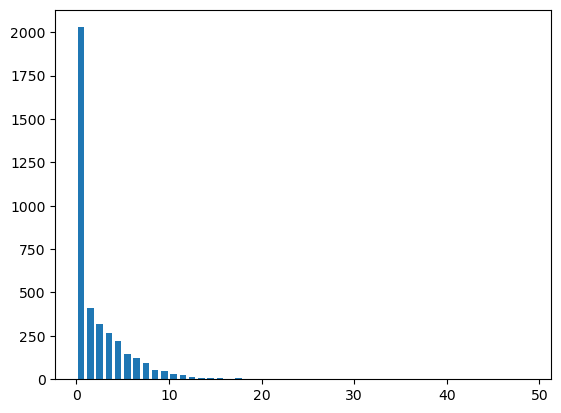

In [14]:
LGN_spike_time,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)

In [31]:
lgn=np.array(LGN_spike_time)
print(lgn.shape)
print(len(lgn[0]))
ar,num=np.unique(lgn,return_counts=True)
# #print(LGN_spike_time[0])
print(ar)
print(num)

(512, 8000)
8000
[0 1 2 3 4]
[3993722   98945    3258      74       1]


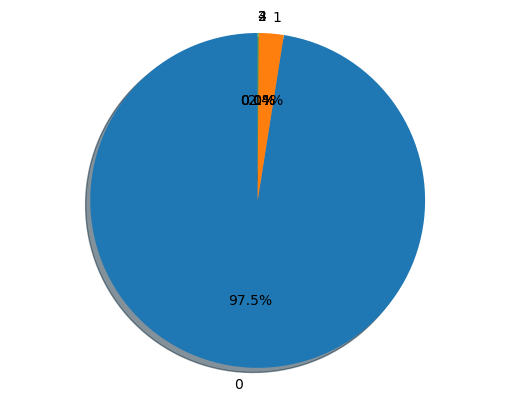

In [33]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '0', '1', '2', '3','4'
explode = (0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. '0')

fig1, ax1 = plt.subplots()
ax1.pie(num, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('lgn_spike.jpg')
plt.show()

-----------实验文件-------------
repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied


(array([1.669e+03, 5.190e+02, 2.560e+02, 1.780e+02, 1.530e+02, 1.130e+02,
        9.300e+01, 7.500e+01, 9.100e+01, 6.300e+01, 5.000e+01, 4.500e+01,
        4.700e+01, 3.500e+01, 3.700e+01, 5.500e+01, 3.600e+01, 3.500e+01,
        3.700e+01, 2.700e+01, 2.600e+01, 2.400e+01, 1.300e+01, 1.600e+01,
        1.500e+01, 1.300e+01, 1.400e+01, 9.000e+00, 8.000e+00, 1.100e+01,
        6.000e+00, 6.000e+00, 1.000e+01, 7.000e+00, 1.000e+00, 5.000e+00,
        6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

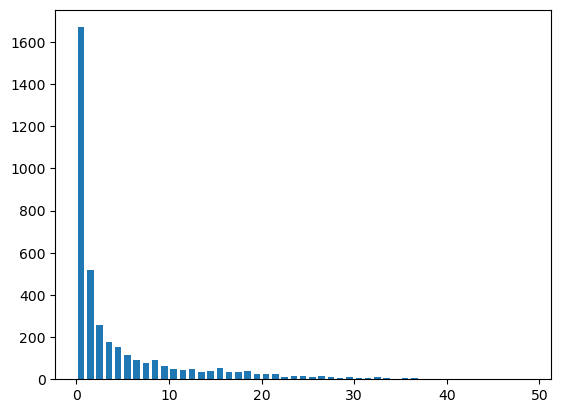

In [18]:
print('-----------实验文件-------------')
# y_1,y_2,y_3,y_4,y_5,y_6=read_grating_bin(contrast6)
#读取/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96/static_color-grid_6.bin作为实验文件
# print(len(y_6))
# print(y_1,y_2,y_3,y_4,y_5)
# print(y_6)
#patch()
minimalTC()#此时还没有替换，cfg文件改为fStimulus = static_color-grid_6.bin
sampleID,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)


In [15]:
print('--------replace之后----------')
replace(contrast10)
z_1,z_2,z_3,z_4,z_5,z_6=read_grating_bin(contrast0)
#替换之后再次读取static_color-grid_0.bin，发现是替换成功了的，
#但是结果却与上一步直接将static_color-grid_6.bin作为输入不一样
print(len(z_6))
print(z_1,z_2,z_3,z_4,z_5)
# print(z_6)
#patch()
minimalTC()

--------replace之后----------
36864
[-1] [12 32 32] [0.5 0.5 0.5] [0.05110313 0.0344    ] [1]
repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied


(array([1.662e+03, 5.360e+02, 2.400e+02, 1.780e+02, 1.340e+02, 1.060e+02,
        8.500e+01, 7.200e+01, 6.900e+01, 6.300e+01, 6.200e+01, 4.200e+01,
        4.300e+01, 3.700e+01, 4.200e+01, 4.300e+01, 3.400e+01, 4.500e+01,
        3.400e+01, 3.200e+01, 2.000e+01, 3.500e+01, 2.100e+01, 2.300e+01,
        1.300e+01, 1.200e+01, 1.300e+01, 1.200e+01, 1.600e+01, 9.000e+00,
        8.000e+00, 6.000e+00, 8.000e+00, 9.000e+00, 7.000e+00, 6.000e+00,
        6.000e+00, 3.000e+00, 1.000e+01, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

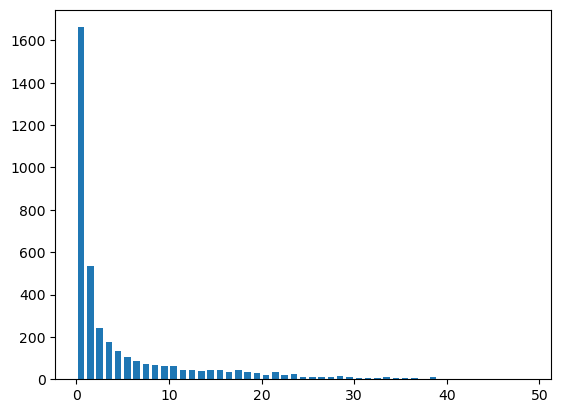

In [16]:
LGN_spike_time,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)

In [37]:
lgn=np.array(LGN_spike_time)
print(lgn.shape)
print(len(lgn[0]))
ar,num=np.unique(lgn,return_counts=True)
# #print(LGN_spike_time[0])
print(ar)
print(num)

(512, 8000)
8000
[0 1 2 3 4 5]
[3932219  155265    8198     312       5       1]


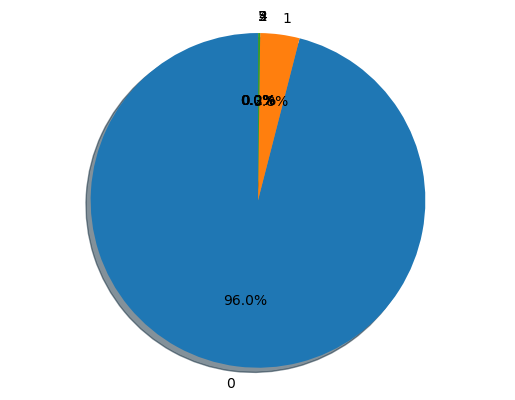

In [38]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = '0', '1', '2', '3','4'
# explode = (0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. '0')

fig1, ax1 = plt.subplots()
ax1.pie(num, labels=ar, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('lgn_spike.jpg')
plt.show()